estávamos trabalhando até então com um único perceptron. A nossa ideia é ampliar essa rede neural e adicionar mais camadas, mais neurônios, e entender como ficaria o resultado fazendo isso.
página NN-SVG para entender como seria o esquema de uma rede neural com mais camadas.
https://alexlenail.me/NN-SVG/index.html



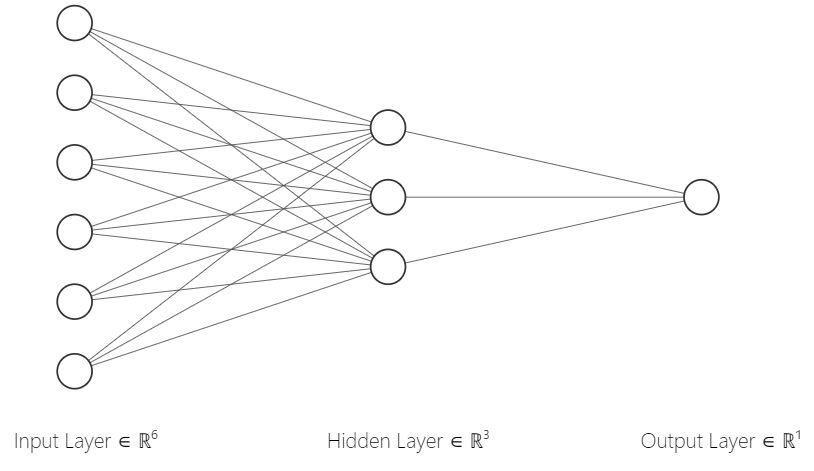

No caso, temos uma ilustração mostrando no canto esquerdo seis círculos. Esses seis círculos são as nossas entradas. Lembrem-se que temos o nosso conjunto de dados com seis variáveis diferentes. Recapitulando, temos a idade, o colesterol, cp1, cp2, cp3 e cp4.

A ideia é colocar uma camada chamada oculta, que vai ficar entre entrada e saída, e vai receber uma quantidade de neurônios. Nesse exemplo, estamos usando três neurônios, e eles sempre vão se conectar com as nossas entradas.

Isso pode ser muito interessante para que a nossa rede neural consiga entender melhor as nossas entradas, entender a relação entre os dados, para trazer uma saída melhor. Depois da camada oculta, temos a saída no final.

Vamos partir para o teste? Vamos criar uma rede neural, que vai ter uma entrada igual a 6, ela vai ter uma camada oculta com 3 neurônios, e ela vai ter uma saída igual a 1.

Só que falta algo. Lembra que, além dos pesos, também temos o viés. Portanto, nessa segunda camada, que é a primeira oculta, vamos adicionar, ao invés de 3, o número 4. Assim, teremos mais um círculo no topo dessa camada.

Do lado esquerdo, no menu de opções, vamos selecionar "Show bias units" que serve para mostrar o viés. Esse círculo a mais é esse viés que temos no modelo.

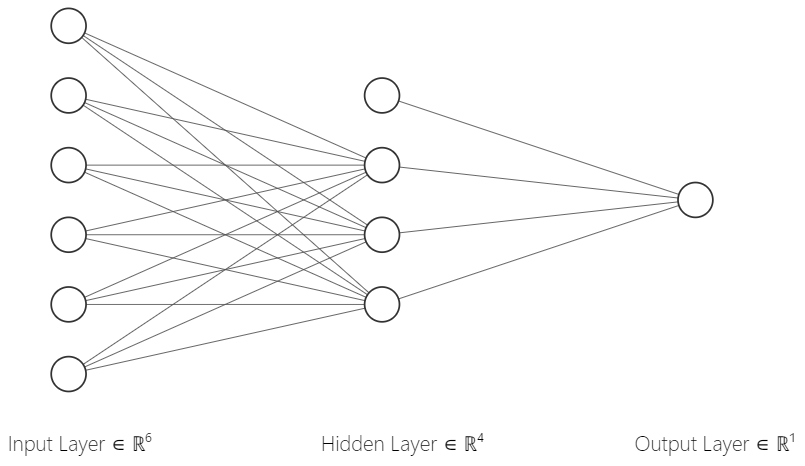



In [1]:
%pip install tensorflow

  Using cached tensorflow-2.16.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.3 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached gast-0.5.4-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-manylinux2010_x86_64.whl.metadata (5.2 kB)
  Using cached ml_dtypes-0.3.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (20 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached termcolor-2.4.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached wrapt-1.16.0-cp311-cp311-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.6 kB)
  Using cached tensorboard-2.16.2-py3-none-any.whl.metadata (1.6 kB)
  Usi

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

tf.random.set_seed(31)
versao_tensorflow = tf.__version__
print(f'Tensorflow instalado na versão: {versao_tensorflow}')

2024-06-09 21:13:18.268442: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-09 21:13:18.273082: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-09 21:13:18.336503: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-09 21:13:19.387190: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Tensorflow instalado na versão: 2.16.1


In [3]:
%pip install ucimlrepo
from ucimlrepo import fetch_ucirepo
doenca_cardiaca = fetch_ucirepo(id=45)

  Using cached ucimlrepo-0.0.7-py3-none-any.whl.metadata (5.5 kB)
Using cached ucimlrepo-0.0.7-py3-none-any.whl (8.0 kB)
Note: you may need to restart the kernel to use updated packages.


In [4]:
X = doenca_cardiaca.data.features
X = X[['age', 'chol', 'cp']]

In [5]:
# Criar variáveis dummy para a coluna 'cp'
df_cp = pd.get_dummies(X['cp'], prefix='cp')
X = X.drop('cp', axis=1)
X = X.join(df_cp)

In [6]:
target = doenca_cardiaca.data.targets
target = (target > 0) * 1

In [7]:
entrada = tf.constant(X, dtype=tf.float32)
y = tf.constant(target, dtype=tf.float32)

In [8]:
# Dividindo os dados em treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(entrada.numpy(), y.numpy(), test_size=0.2,
stratify=y.numpy(), random_state=4321)


In [9]:
# Normalizando os dados
scaler = StandardScaler()
X_treino = scaler.fit_transform(X_treino)
X_teste = scaler.transform(X_teste)

# Convertendo para tensores do TensorFlow
X_treino = tf.constant(X_treino, dtype=tf.float32)
X_teste = tf.constant(X_teste, dtype=tf.float32)
y_treino = tf.constant(y_treino, dtype=tf.float32)
y_teste = tf.constant(y_teste, dtype=tf.float32)
